Goal: use 538 data to understand if we can trust online reviews and ratings.

data from "fandango" tree in https://github.com/fivethirtyeight/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Scatterplot showing the relationship between rating and votes

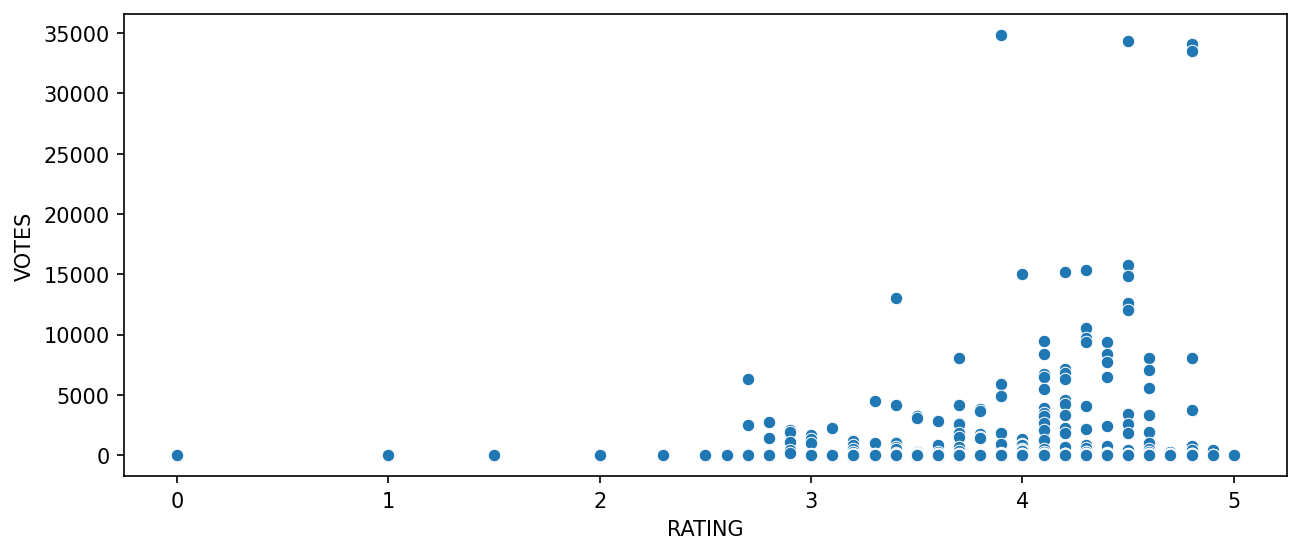

In [23]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

In [8]:
#calculate correlations between columns

fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
#add new column that lists the release year of the movies

fandango['YEAR'] = fandango['FILM'].apply(lambda title : title.split('(')[-1])

How many movies are in the Fandango DataFrame per year?

In [11]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

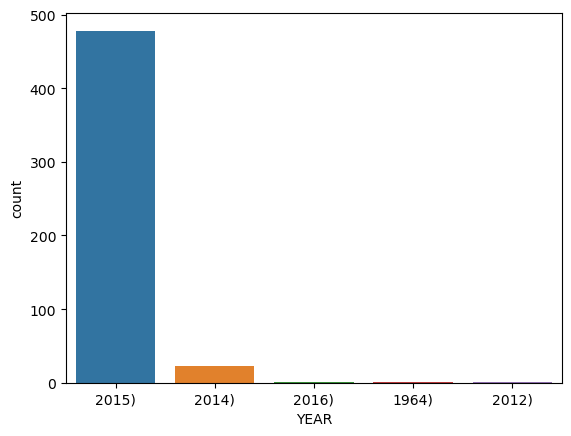

In [24]:
#visualization of the number of movies per year

sns.countplot(data=fandango,x='YEAR')

What are the 10 movies with the highest number of votes?

In [14]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


How many movies have zero votes? Remove movies that have zero votes.

In [17]:
zero_votes = fandango['VOTES']==0 
zero_votes.sum()

69

In [27]:
#fan_reviewed is a new dataframe with movies that have non-zero votes only

fan_reviewed = fandango[fandango['VOTES']>0]

Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). 

Clip the KDEs to 0-5.

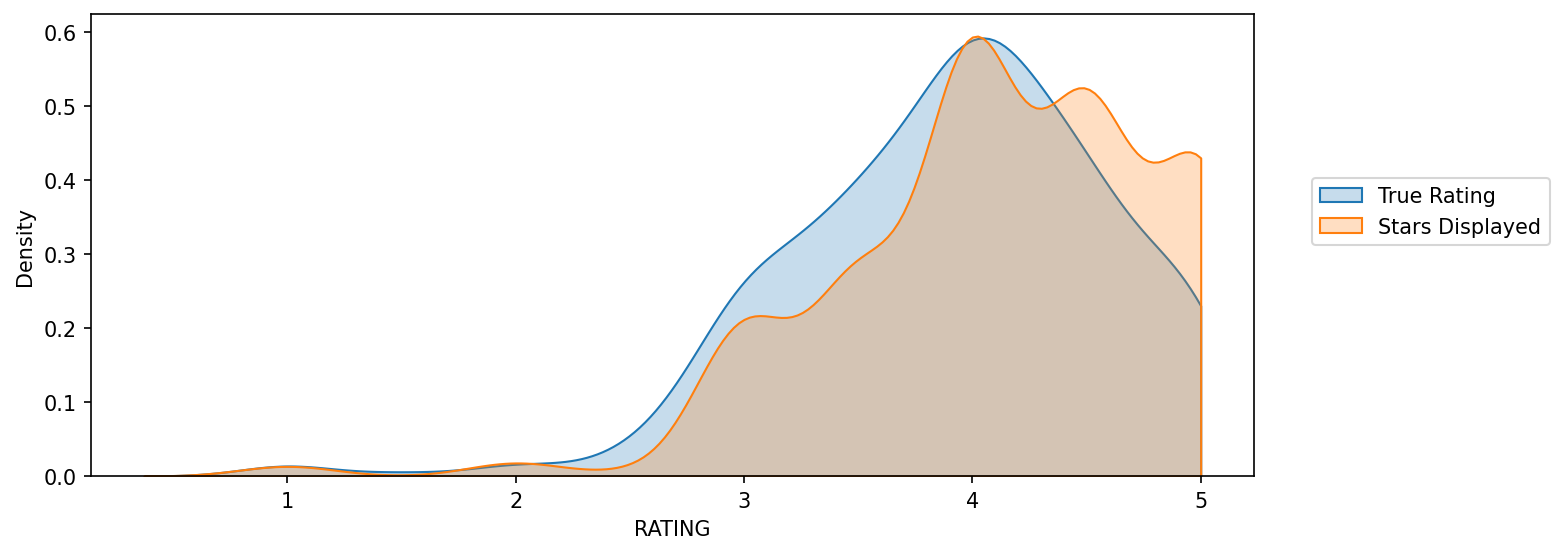

In [21]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.

In [35]:
fan_reviewed["STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING'] 
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\abhi1\AppData\Local\Temp\ipykernel_24036\1515829454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\abhi1\AppData\Local\Temp\ipykernel_24036\1515829454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [36]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


Create a count plot to display the number of times a certain difference occurs:

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

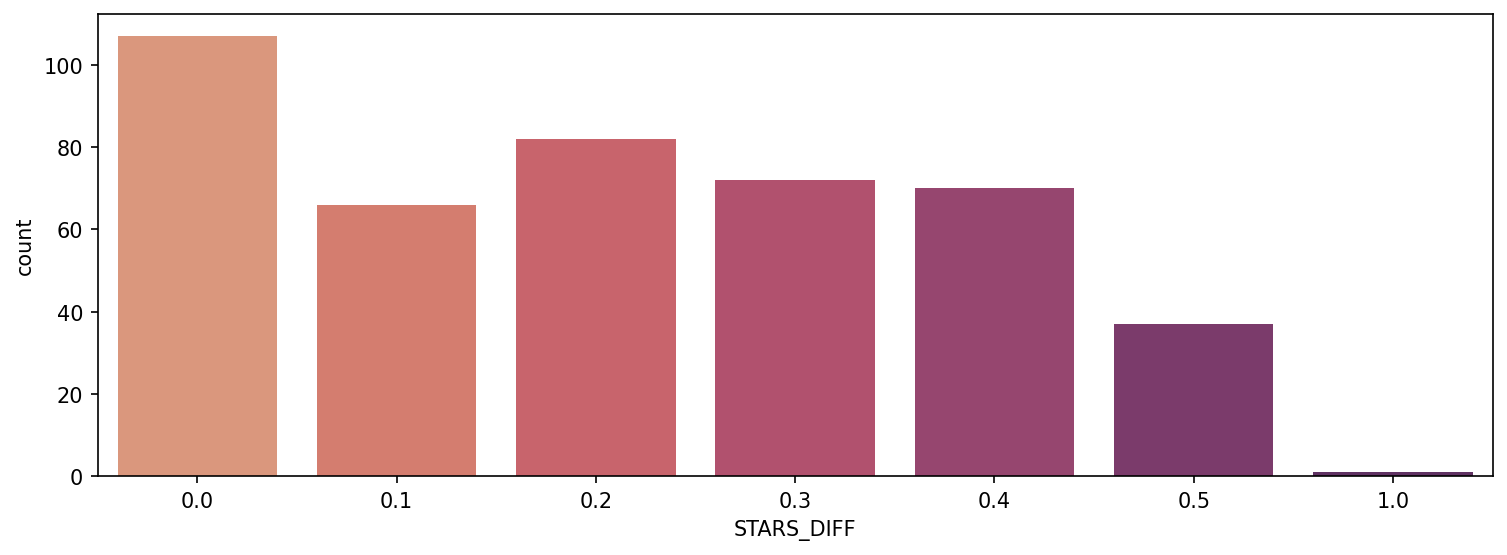

In [40]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='flare')

What movie had this close to 1 star differential?

In [41]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


Compare the scores from Fandango to other movie sites

In [42]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [43]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [44]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [45]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Rotten Tomatoes

Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

(0.0, 100.0)

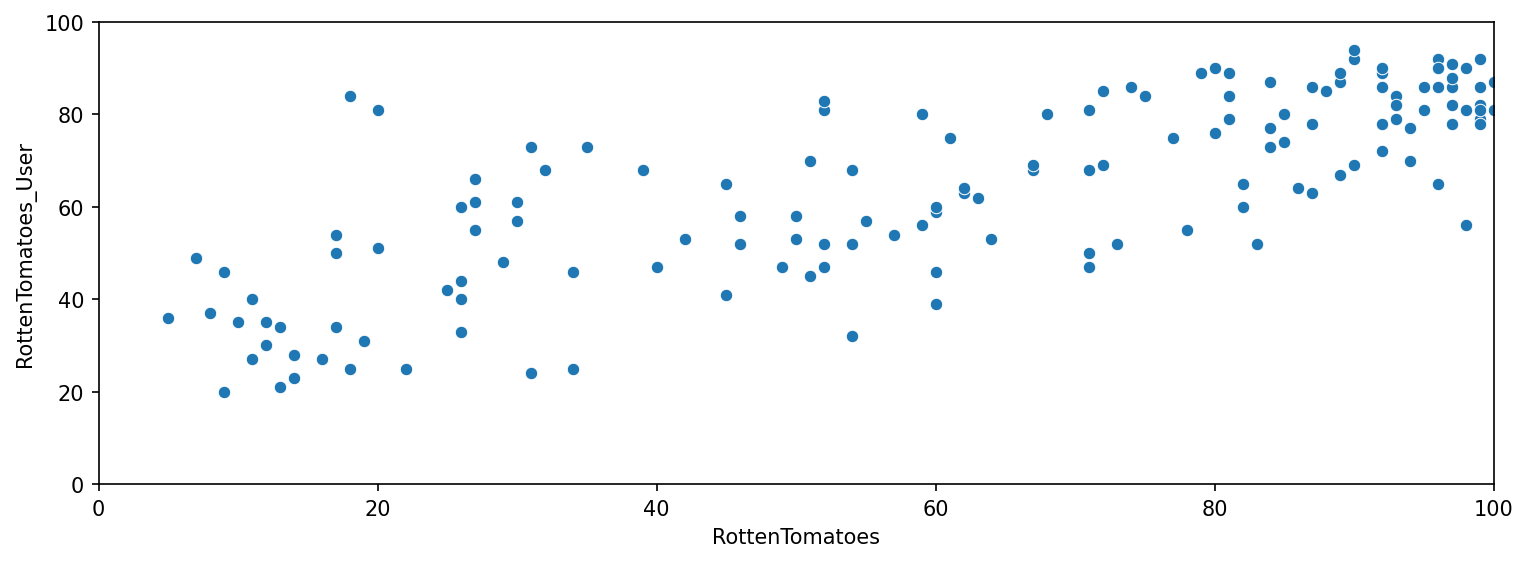

In [48]:
plt.figure(figsize=(12,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

plt.xlim(0,100)
plt.ylim(0,100)

Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes

In [49]:
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.

In [50]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Plot the distribution of the differences between RT Critics Score and RT User Score.

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

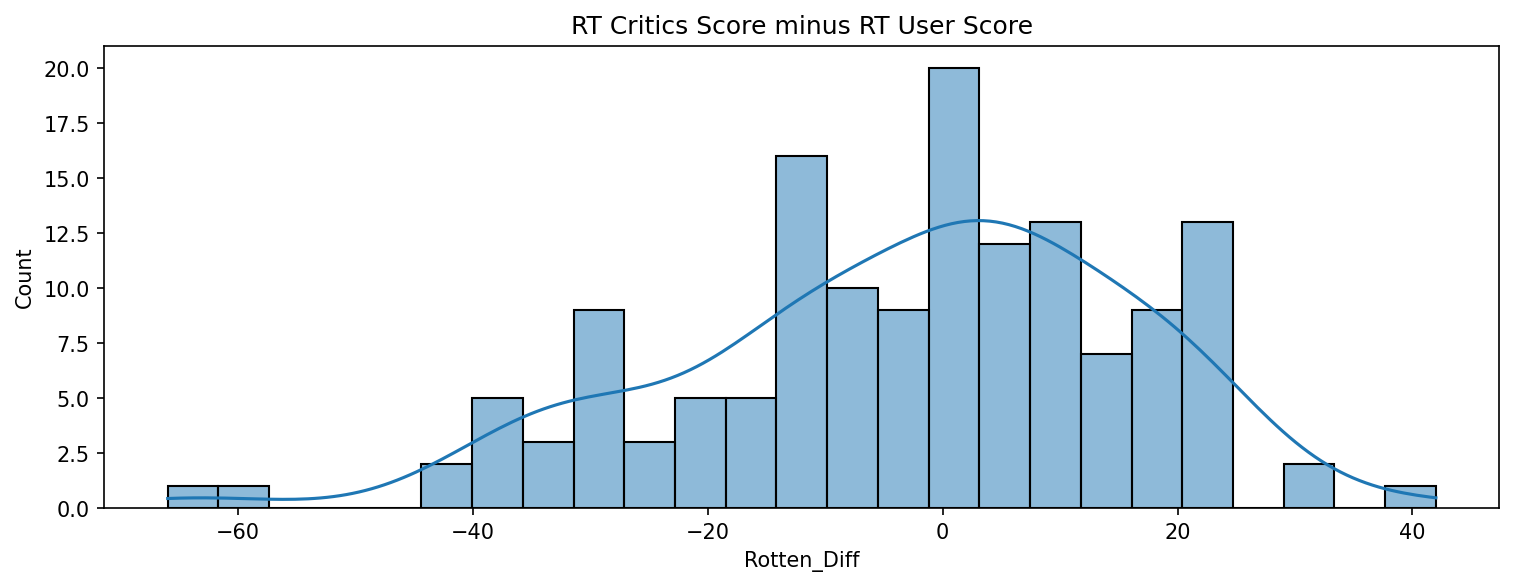

In [51]:
plt.figure(figsize=(12,4),dpi=150)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)

plt.title("RT Critics Score minus RT User Score")

Create a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

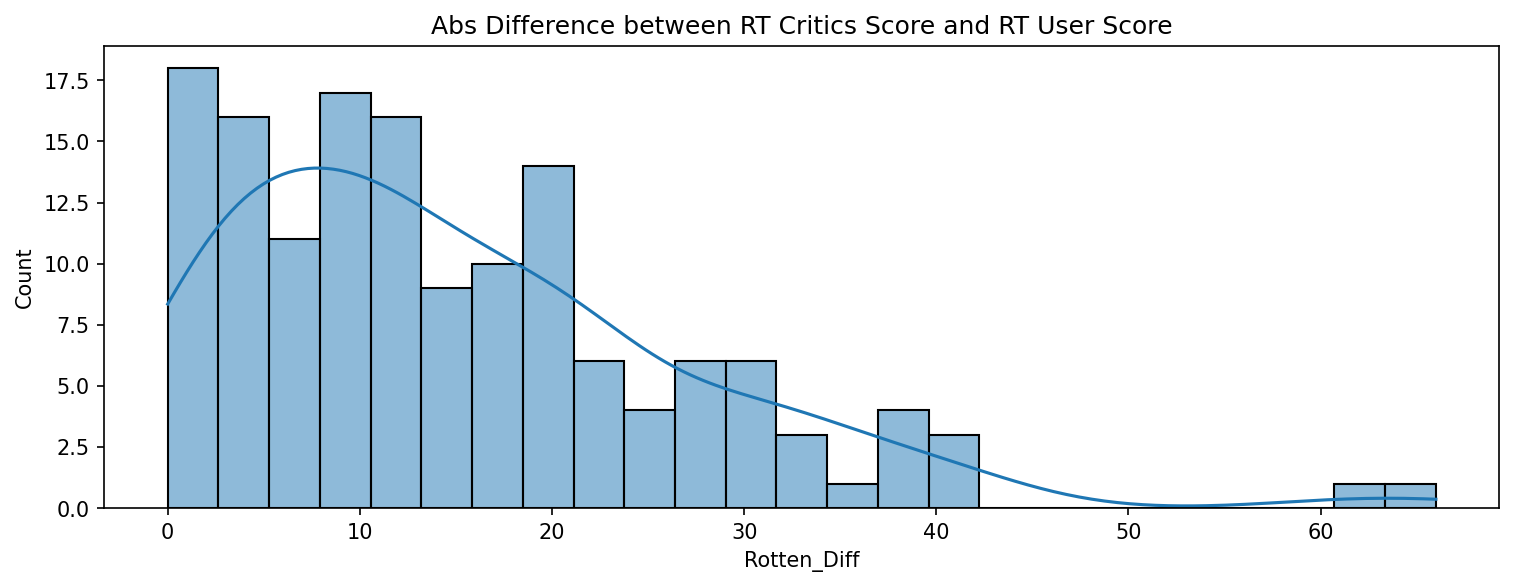

In [54]:
plt.figure(figsize=(12,4),dpi=150)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)

plt.title("Abs Difference between RT Critics Score and RT User Score")

What are the top 5 movies users rated higher than critics on average:

In [55]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Now show the top 5 movies critics scores higher than users on average.

In [56]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


MetaCritic

Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.

(0.0, 10.0)

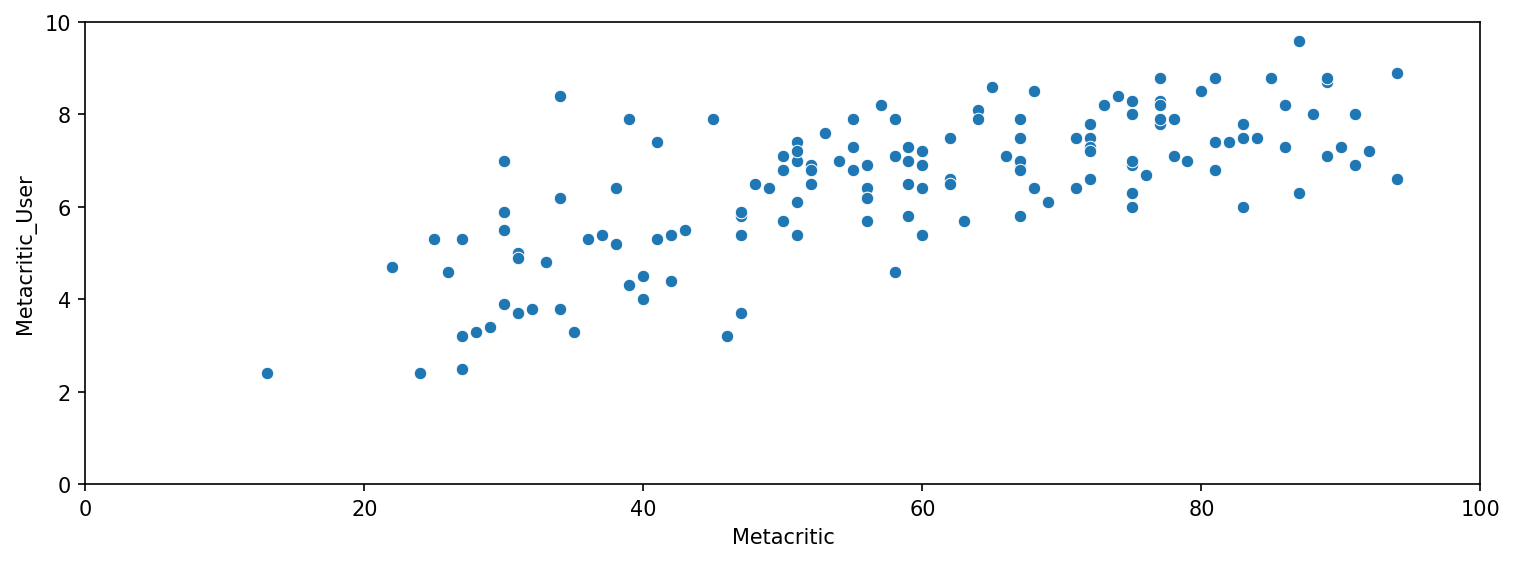

In [57]:
plt.figure(figsize=(12,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

plt.xlim(0,100)
plt.ylim(0,10)

IMDB

Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

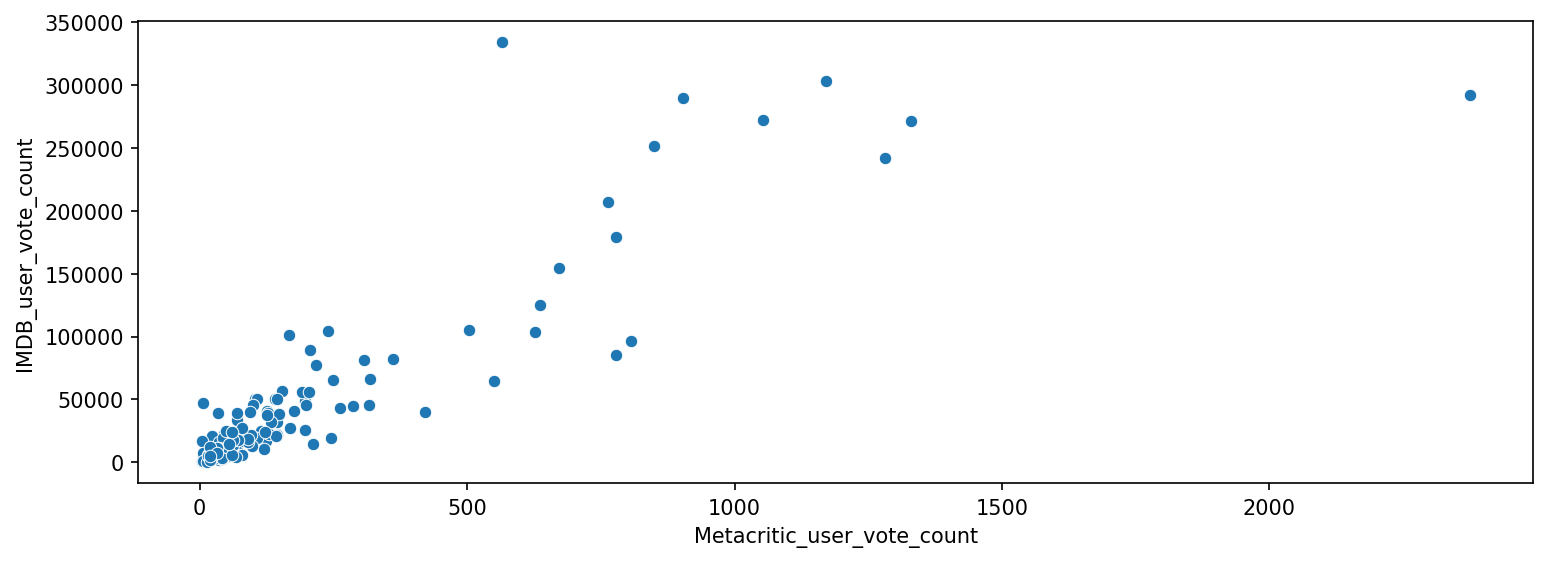

In [58]:
plt.figure(figsize=(12,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

What movie has the highest IMDB user vote count?

In [59]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


What movie has the highest Metacritic User Vote count?

In [60]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


Fandango Scores vs All Sites

Combine the Fandango Table with the All Sites table.

In [61]:
#use an inner merge to only compare data in both dataframes

df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [63]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


In [64]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.

In [65]:
#for rotten tomatoes:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

#for metacritic:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

#for IMDB:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [66]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Now create a norm_scores DataFrame that only contains the normalizes ratings.

In [67]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [68]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


Create a plot comparing the distributions of normalized ratings across all sites.

<AxesSubplot:ylabel='Density'>

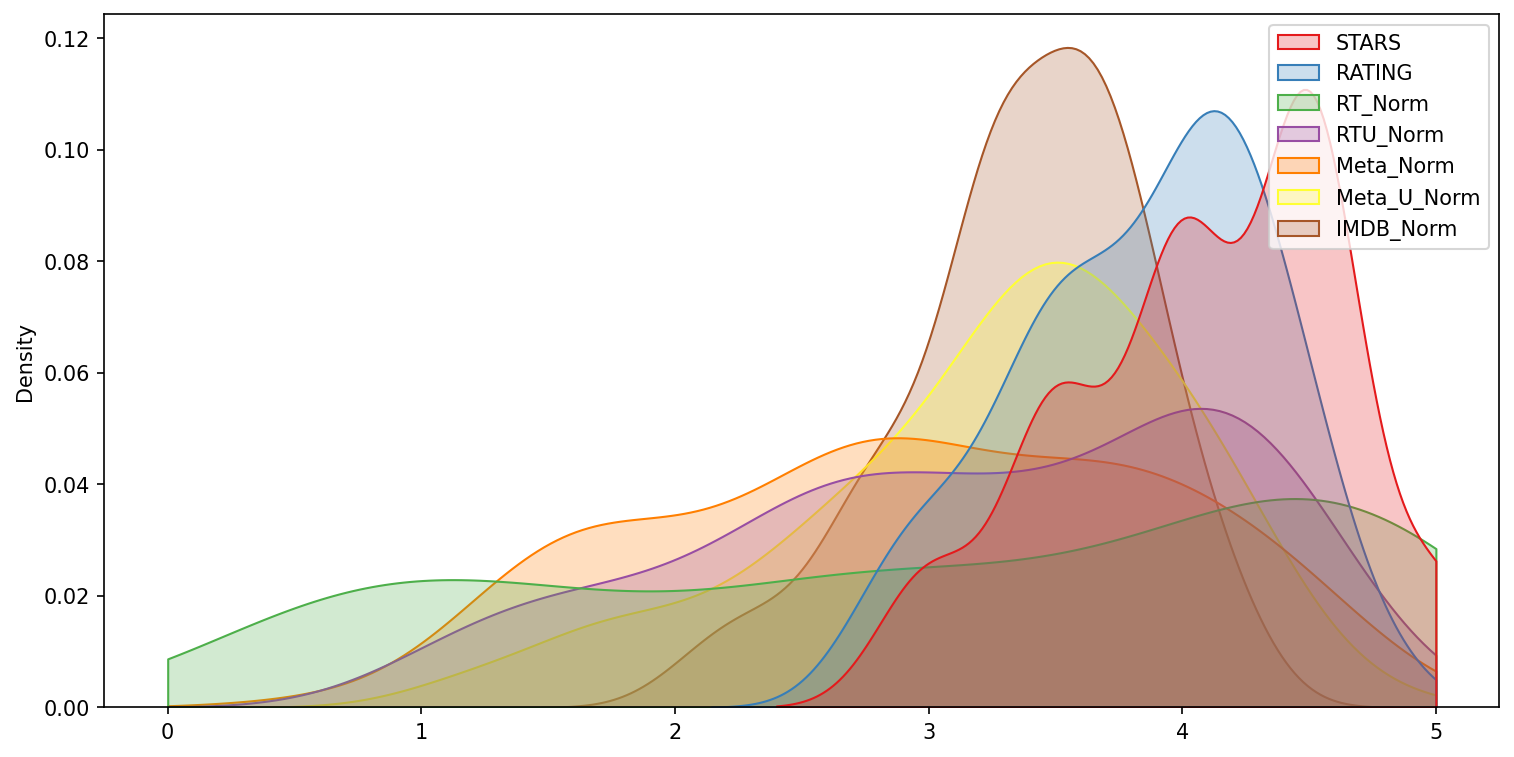

In [81]:
fig, ax = plt.subplots(figsize=(12,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)

Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

<AxesSubplot:ylabel='Density'>

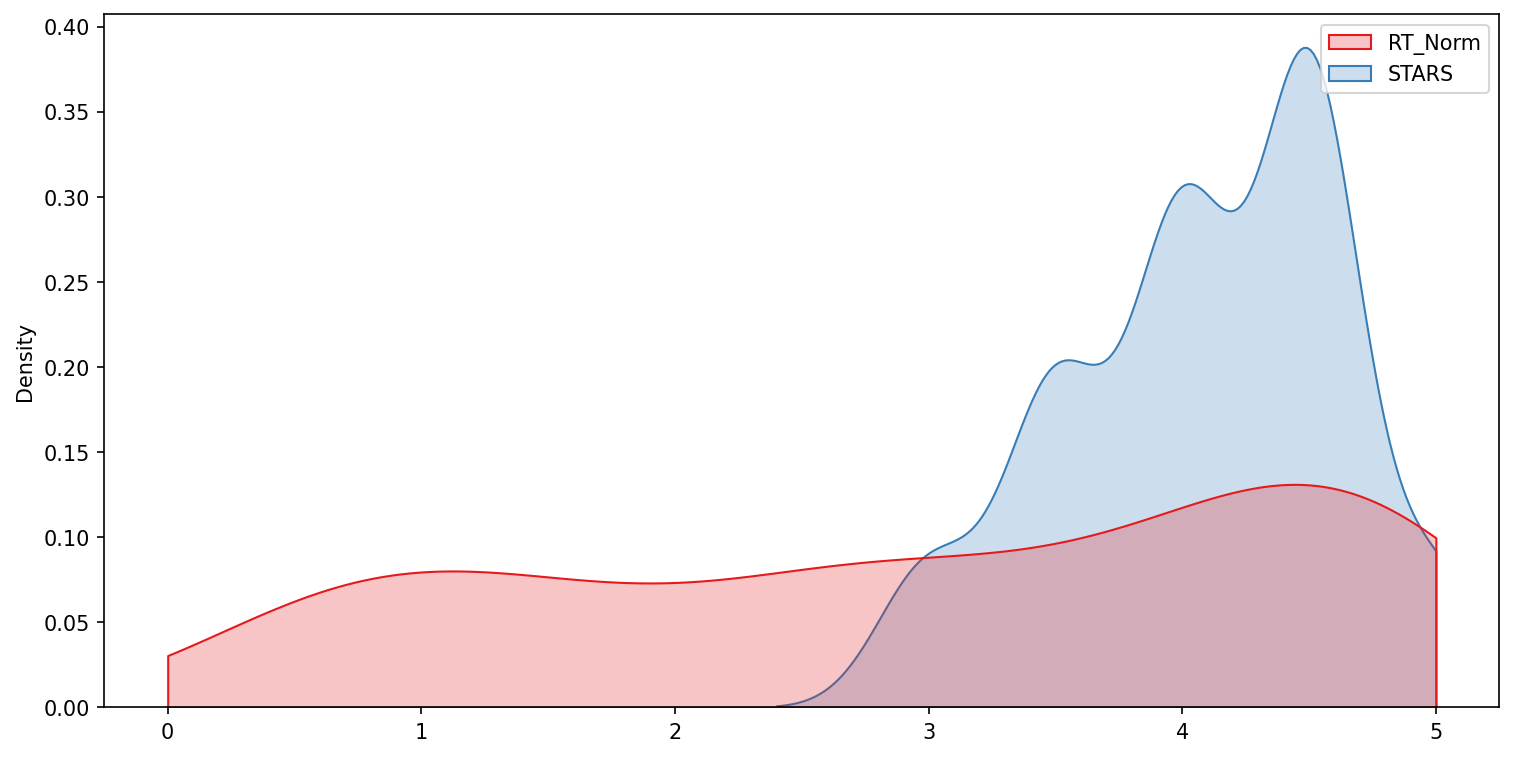

In [80]:
fig, ax = plt.subplots(figsize=(12,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)

Create a histplot comparing all normalized scores.

<AxesSubplot:ylabel='Count'>

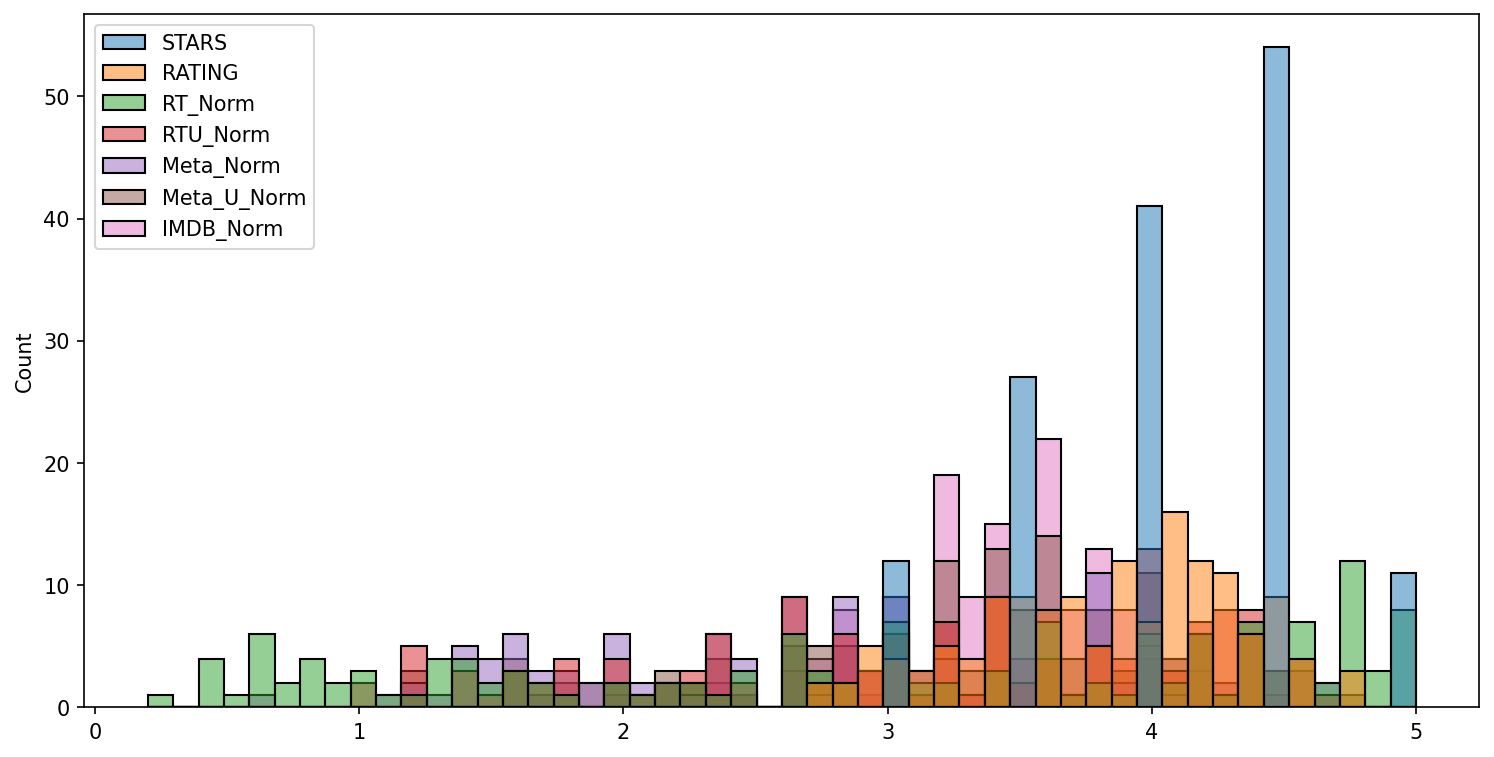

In [79]:
plt.subplots(figsize=(12,6),dpi=150)
sns.histplot(norm_scores,bins=50)

Create a clustermap visualization of all normalized scores. 

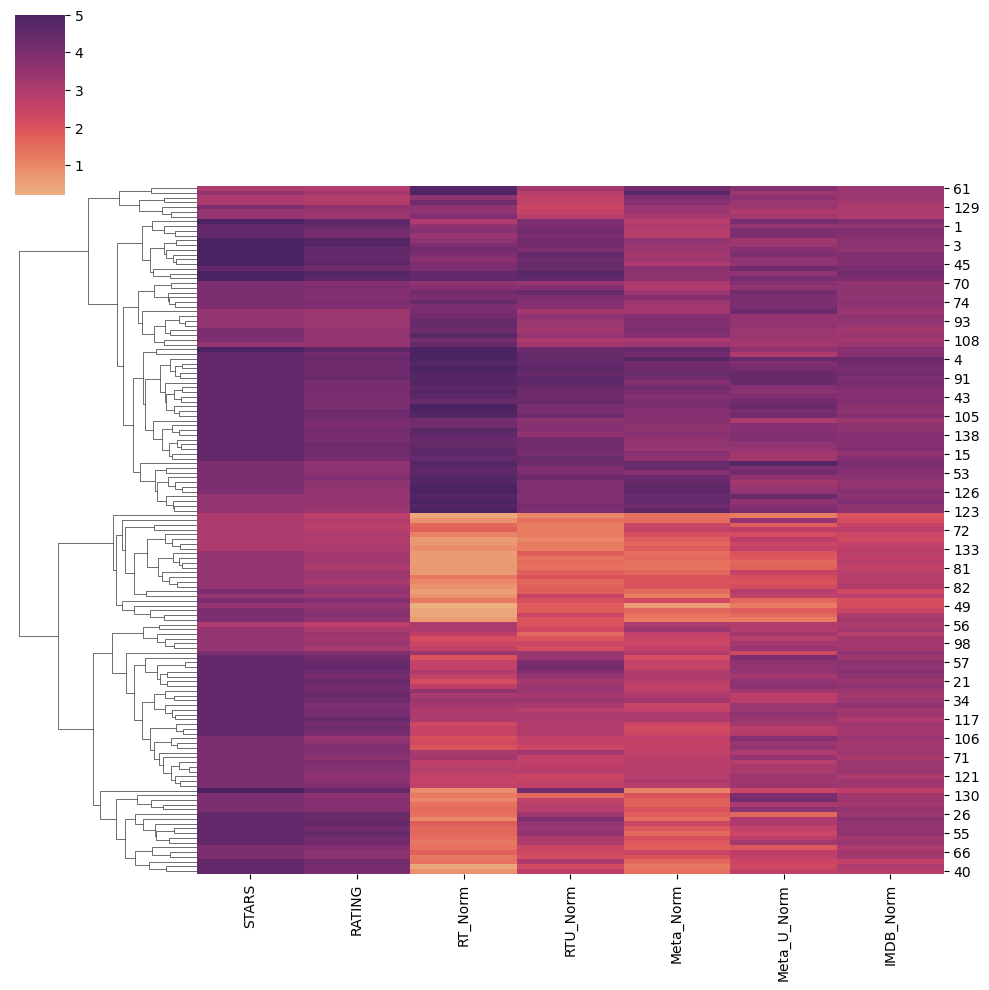

In [83]:
sns.clustermap(norm_scores,cmap='flare',col_cluster=False)

Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?

In [84]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [85]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Visualize the distribution of ratings across all sites for the top 10 worst movies.

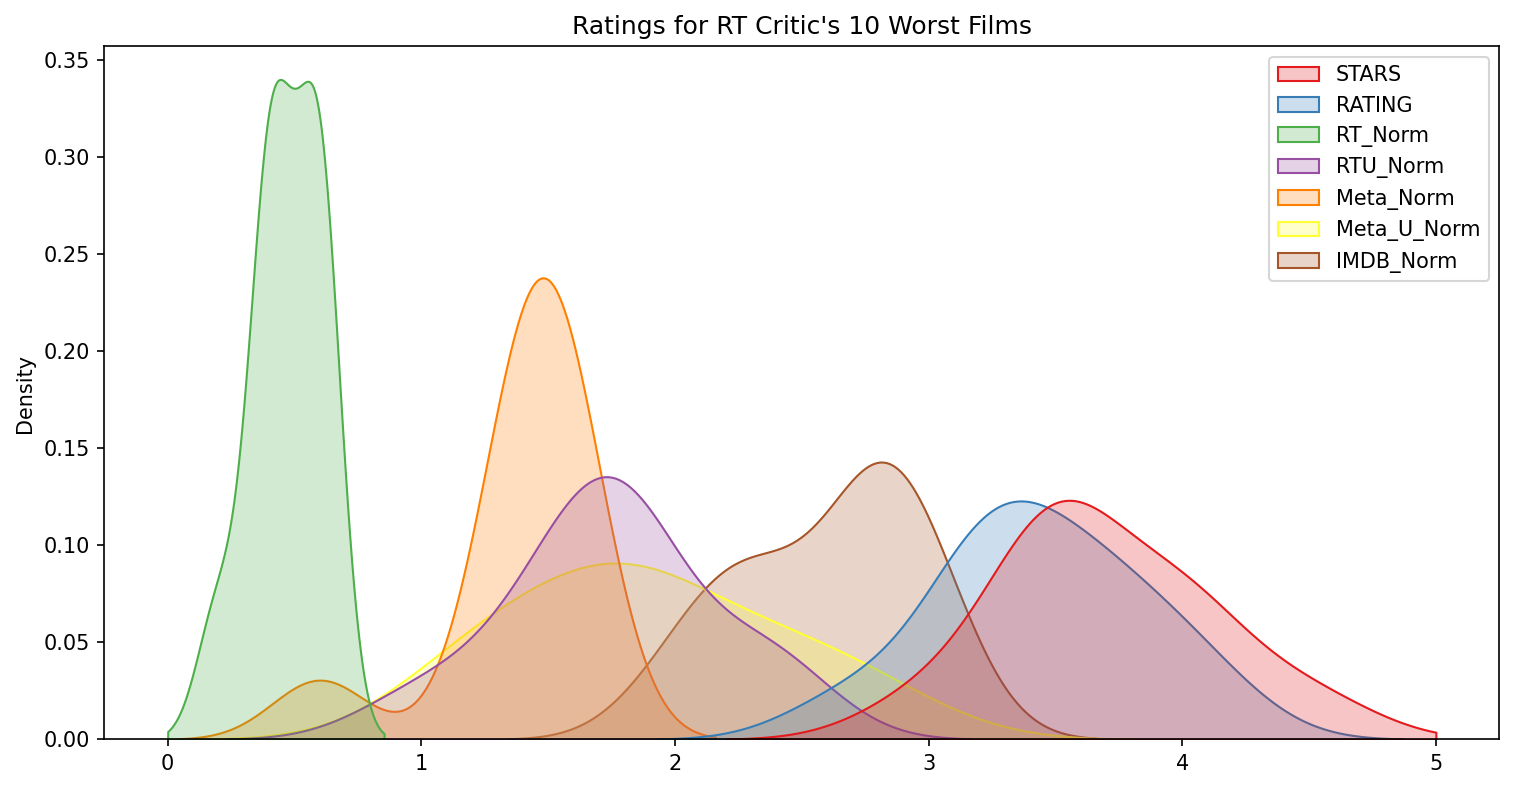

In [86]:
plt.figure(figsize=(12,6),dpi=150)

worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)

sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Films");

Clearly Fandango (STARS & RATINGS) reviews are skewed positive, even for the worst rated movies on other sites

In [87]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object